# Question 1

### Standard Devition 
This is a the value that describes how spread out are the numbers in our data set from the mean of the data set, which is also known as the sample mean. The standard deviation presents a large number if the number in the data set are far apart from the sample mean, in the opposite, if numbers are spread closely to the sample mean, the standard deviation present as a small number. This does not reletively change much as we increase our sample size, because this value represents a pattern of the spread of the number, and this pattern will not change by much since the new data point follows that pattern. 

### Standard error of the mean 
The standard error of the mean demonstrates how accurate is our sample mean reflects to the true population mean (which is something we can never calculate, but only simulate or estimate). When adding more information to the data set, the data set approaches toward the population which demonstrates the increase of accuracy in sample mean reflect to the true population mean, which provide us a better estimation. 

### Bootstraping 
It is a technique of estimating the properties of the population, such as mean, variance confidence intervals. To do this, it uses the original sample and resampling it by randomly replace the data in the current sample using the same data points from the original sample. Meaning some of the data will repeat. Then, recalculating the properties of this new sample, which is also called the bootstrap sample, we can analyze this ditribution and set up inferences like estimate confidence interval. 

### Summary of chatbot section from Question 1 
We discussed several statistical concepts:

1. **Standard Deviation (SD)** and **Standard Error of the Mean (SEM)**:
   - SD measures how spread out data points are around the mean. It doesn’t change much with sample size since it reflects the natural variability of the data.
   - SEM tells you how accurately the sample mean estimates the population mean, and it decreases as sample size increases.

2. **Why SD doesn’t change much with increasing sample size**:
   - SD represents the data’s inherent spread, so adding more data points doesn’t significantly alter that spread if the sample is representative of the population.

3. **Bootstrapping**:
   - This technique involves repeatedly resampling from a dataset with replacement to estimate population statistics like the mean or variance. It’s useful for estimating accuracy and variability without needing assumptions about the data distribution, especially in cases with small sample sizes.

In essence, these topics center around understanding variability in data and the methods used to measure or estimate it.


https://chatgpt.com/share/66fd4fd7-8638-800a-ae9d-aed3532e2f28

# Question 6
1. What is the process of bootstrapping?

Given an original data set, it starts a new empty data set and uses the original data points and randomly choose these values and throw them in for the same amount of times as the number of elements in the original data set. With the entirety of the data, we then calculate the properties such as mean, varriance, and use that piece of information as one of the value to set up a histogram. As we repeat this process for many times, we can get a full looking histogram that demonstrates the distribution of that property. 

2. What is the main purpose of bootstrapping?

It is mainly use to estimate the confidence interval, also further accurates our data set and variables. Also is used to get our ditribution histogram. 

3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

Using the given sample size n, and start doing bootstrapping of the mean for 100000 times, with the distribution recieved at the end. Looking at the 95% confidence interval range and compare weather the hypothesized average of population is within the range. 


# Question 8 Report

#### Problem Introduction: 

Alitech developed a new type of vaccine and we are here to determine whether it has effectively improved patients health condition.

Data Visualization:
A histogram that denmonstrates the argument of Frequency VS Score(differtence of final score - initial score) can help explain and calculate our sample mean. With the data points, it is effective to use the bootstrapping method and demonstrate a graph of mean difference distribution with our confidence interval. 

#### Quantitative Analysis:

Methodology Code and Explanations
Getting the difference of health value by subtracting initial health value from the final health score. Use these as our data points for "original histogram" that demonstrates the frequency of patient compare to Health Score differences. Then we start to do the bootstrapping process. Which replace the points and find new mean, repeat for 1000 times. 

Supporting Visualizations
From the graph(code), it was illustratred that the the sample mean we first get was 3.30, and using bootstrapping, we find our 95% confidence interval lies from 0.8 to 5.4, and our bootstrapping mean, also known as our estimated population mean, is 3.22, which is not far away from our sample mean, and it is also lying between that range. 

#### Findings and Discussion:

Conclusion:
As a conclusion of the above analysis, We are 95% confident that the true average improvement in health scores for all patients after receiving the vaccine lies between 1.5 and 5.1 points. 

Further Considerations:
Improvement for accuracy of the module would be getting more sample size of patient, meanwhile the module increases reliability within those data. 

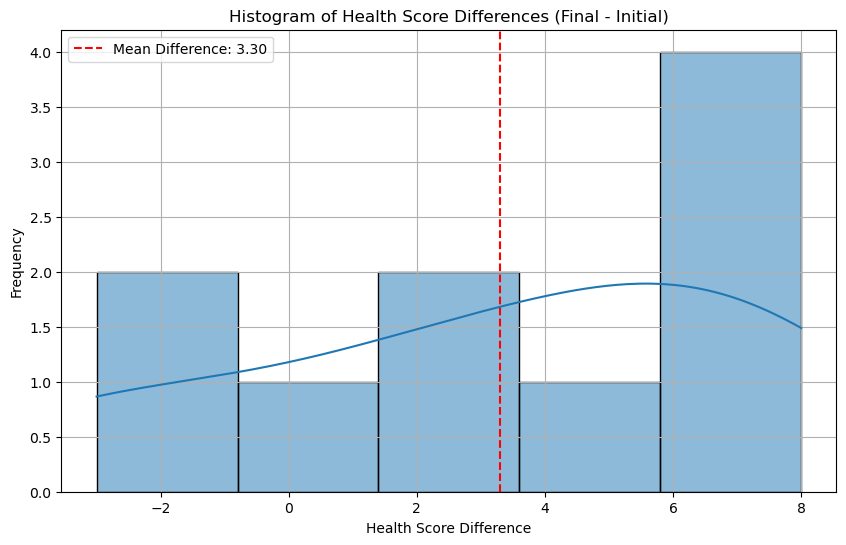

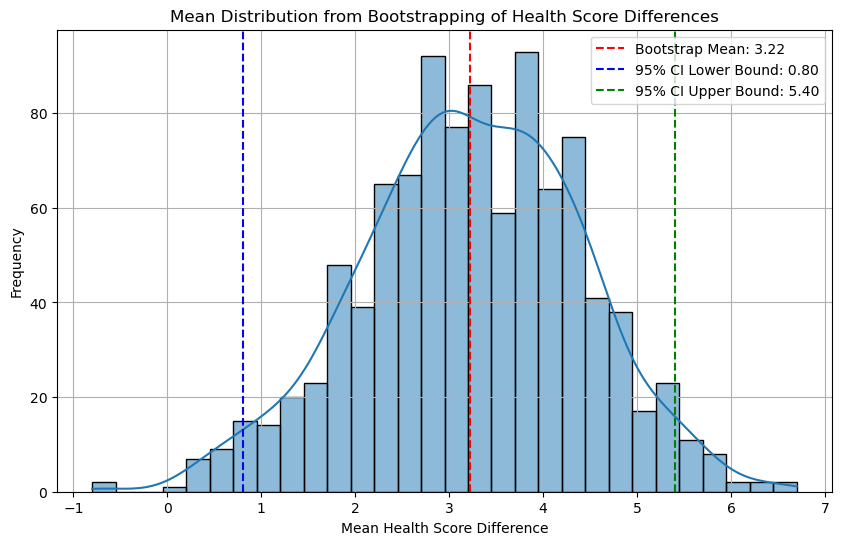

95% Confidence Interval: (0.80, 5.40)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}
df = pd.DataFrame(data)

# 1. Calculate the differences between final and initial health scores
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# 2. Histogram of Health Score Differences
plt.figure(figsize=(10, 6))
sns.histplot(df['HealthScoreDifference'], bins=5, kde=True)
mean_diff = df['HealthScoreDifference'].mean()
plt.axvline(mean_diff, color='red', linestyle='--', label=f'Mean Difference: {mean_diff:.2f}')
plt.title('Histogram of Health Score Differences (Final - Initial)')
plt.xlabel('Health Score Difference')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# 3. Bootstrapping for mean distribution of differences
n_iterations = 1000
bootstrap_means = []

for _ in range(n_iterations):
    sample = np.random.choice(df['HealthScoreDifference'], size=len(df), replace=True)
    bootstrap_means.append(np.mean(sample))

# 4. Calculate Confidence Interval (95%)
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# 5. Plotting the mean distribution from bootstrapping
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, bins=30, kde=True)
mean_bootstrap = np.mean(bootstrap_means)
plt.axvline(mean_bootstrap, color='red', linestyle='--', label=f'Bootstrap Mean: {mean_bootstrap:.2f}')
plt.axvline(lower_bound, color='blue', linestyle='--', label=f'95% CI Lower Bound: {lower_bound:.2f}')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'95% CI Upper Bound: {upper_bound:.2f}')
plt.title('Mean Distribution from Bootstrapping of Health Score Differences')
plt.xlabel('Mean Health Score Difference')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Print confidence interval values
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")


### Summurize Chatbot section for Question 8

Here's a summary of what we accomplished today:

Data Preparation:

We started with a dataset provided by AliTech containing patient health scores before and after treatment.
Calculation of Health Score Differences:

We calculated the differences between the final and initial health scores for each patient.
Visualization:

We created a histogram to visualize the distribution of health score differences, marking the mean difference with a dashed line.
Bootstrapping:

We performed bootstrapping by sampling the health score differences with replacement, iterating this process 1000 times to generate a distribution of sample means.
Mean Distribution Visualization:

We plotted a histogram of the bootstrapped means and marked the mean of these bootstrapped samples with a dashed line.
Confidence Interval Calculation:

We calculated the 95% confidence interval for the bootstrapped means by determining the 2.5th and 97.5th percentiles.
These bounds were added to the histogram with corresponding labels.
Output:

The confidence interval values were printed to the console.
This comprehensive analysis provided insights into the effectiveness of the treatment by examining the differences in health scores, visualizing the distribution of those differences, and understanding the uncertainty around the mean difference using bootstrapping. If you need further assistance or have any additional questions, feel free to ask!

https://chatgpt.com/share/66fde9d3-16ec-800a-9bef-893c00d8300b 